In [1]:
import csv
import numpy as np
import scipy as sp
import astropy as ap
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("tao_aponte_01_catalogue_3963.csv") #read in dataset
#data

In [3]:
from astropy.cosmology import WMAP9 #import relevant cosmology (find way to automate this for each dataset)

In [4]:
#Estimate supernova rate per stellar mass using arbitrary parameters for now (added the multiplcation for the units - 10^10  solar mass)

try:
    supernovae_rate_per_stellar_mass = ((((1/100)))*((data['Total_Stellar_Mass'])))*(10**10)/(10**10.5)
except:
    supernovae_rate_per_stellar_mass = ((((1/100)))*((data['total_stellar_mass'])))*(10**10)/(10**10.5)
    
#supernovae_rate_per_stellar_mass

In [5]:
#Estimate supernova rate per star formation rate using arbitrary parameters for now

try:
    supernovae_rate_per_star_formation_rate = ((1/100))*(data['Total_Star_Formation_Rate'])
except:
    supernovae_rate_per_star_formation_rate = ((1/100))*(data['total_star_formation_rate'])
    
#supernovae_rate_per_star_formation_rate

In [6]:
#Estimate  TDE rate 
blackholemass = np.array(data['Black_Hole_Mass'])*10**10

bh = np.zeros_like(blackholemass)

#print(blackholemass, bh)

bh[((blackholemass >= 10**6)&(blackholemass <= 10**7))] = 1


     
        
try:
    blackhole_rate_per_TDE_rate = ((1/10000))*(bh)
except:
    blackhole_rate_per_TDE_rate = ((1/10000))*(bh)
    
#blackhole_rate_per_TDE_rate

In [7]:
#Insert supernova rates into tables

data.insert(loc=8,
          column='supernovae_rate_per_stellar_mass',
          value=supernovae_rate_per_stellar_mass)        

data.insert(loc=9,
          column='supernovae_rate_per_star_formation_rate',
          value=supernovae_rate_per_star_formation_rate)   

data.insert(loc=10,
          column='blackhole_rate_per_TDE_rate',
          value=blackhole_rate_per_TDE_rate)   

#data

In [8]:
#Finding solid angle for 2 square degree field (automate this for dataset)

from astropy import units as u
theta_RA  = 2 * 3600 * u.arcsec
theta_dec = 2 * 3600 * u.arcsec
Omega = (theta_RA * theta_dec).to(u.steradian).value # get rid of unit
z = np.array(data['Redshift_Observed'])


In [9]:
#Some useful parameters

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
bins_z = np.linspace(np.min(z), np.max(z), 100)
binsize = (np.max(z) - np.min(z))/100
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

In [10]:
#Calculating Diff Comoving Volume
from scipy import integrate 
volume = []
for i in range(1, len(bins_z)):
    LAMBDA1 = ((i)*(binsize)-1*(binsize))
    LAMBDA2 = (i*(binsize))                             
    #bin_means_z.append([z[digitized_z == i].mean()])
    #bin_means_tde.append([(tde[digitized_z == i].mean())/(d2-d1)])
comoving_volume = WMAP9.differential_comoving_volume(bins_z)
volume.append(integrate.cumtrapz(comoving_volume, bins_z, binsize) * Omega * 100)

#volume

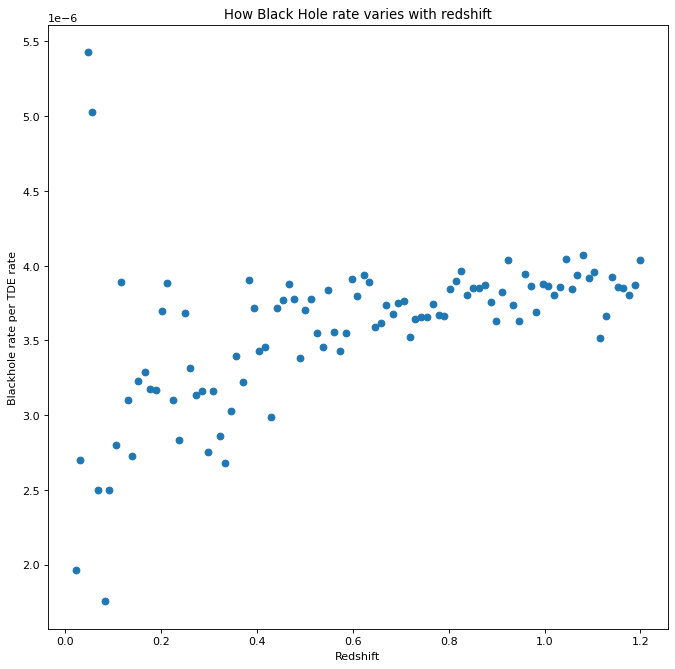

In [11]:
#TDE rate in deg^2

    

tde = data['blackhole_rate_per_TDE_rate']


bin_means_z = [z[digitized_z == i].mean() for i in range(1, len(bins_z))]
bin_means_tde = [tde[digitized_z == i].mean() for i in range(1, len(bins_z))]


plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_tde)/4)
plt.xlabel('Redshift')
plt.ylabel('Blackhole rate per TDE rate')
plt.title('How Black Hole rate varies with redshift')

plt.show()

Text(0.5, 1.0, 'How TDE rate varies with redshift')

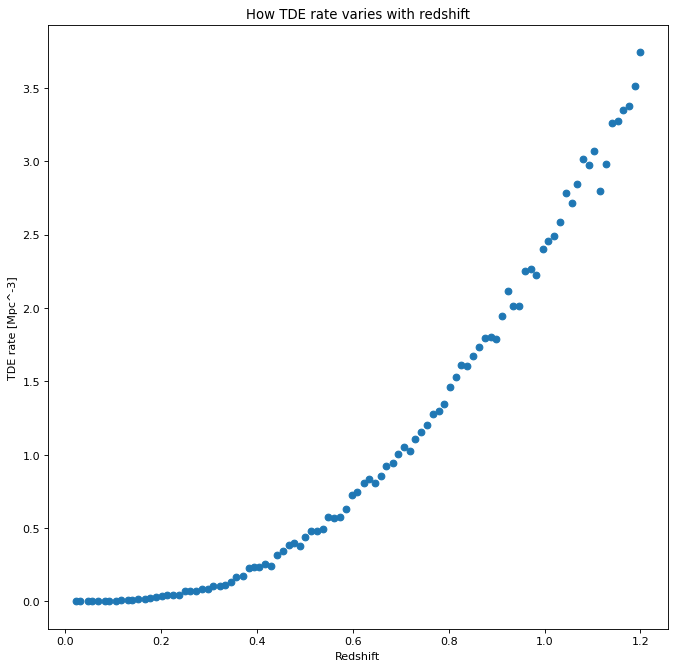

In [12]:
#TDE rate in Mpc^-3

    
tde = data['blackhole_rate_per_TDE_rate']

bin_means_z = [z[digitized_z == i].mean() for i in range(1, len(bins_z))]
bin_means_tde = [tde[digitized_z == i].mean() for i in range(1, len(bins_z))]

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_tde)/10**4*np.array(volume))
plt.xlabel('Redshift')
plt.ylabel('TDE rate [Mpc^-3]')
plt.title('How TDE rate varies with redshift')

#plt.show()

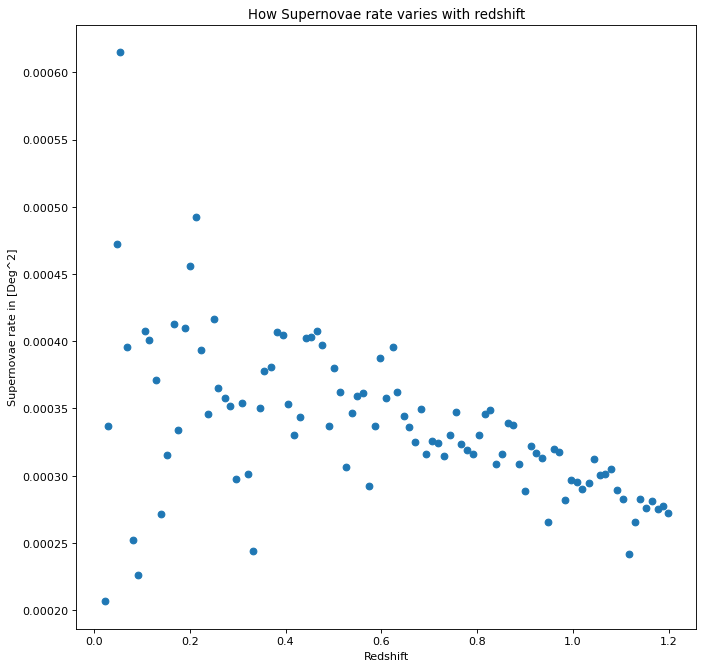

In [13]:
#Supernova rate per stellar mass in deg^2
sm = data['supernovae_rate_per_stellar_mass']

bin_means_z = [z[digitized_z == i].mean() for i in range(1, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(1, len(bins_z))] 

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sm)/4)
plt.xlabel('Redshift')
plt.ylabel('Supernovae rate in [Deg^2]')
plt.title('How Supernovae rate varies with redshift')

plt.show()

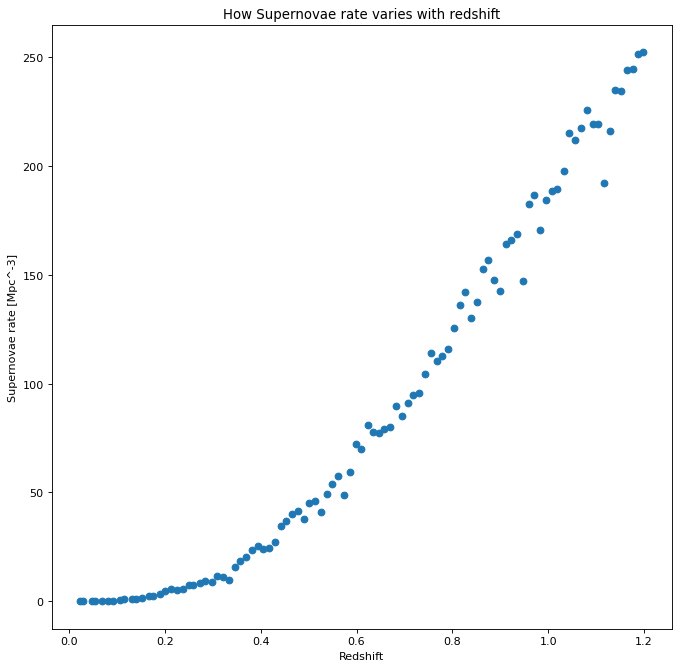

In [14]:
#Supernova rate per stellar mass in Mpc^-3

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
sm = data['supernovae_rate_per_stellar_mass']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(1, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(1, len(bins_z))] 

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sm)/10**4*np.array(volume))
plt.xlabel('Redshift')
plt.ylabel('Supernovae rate [Mpc^-3]')
plt.title('How Supernovae rate varies with redshift')

plt.show()

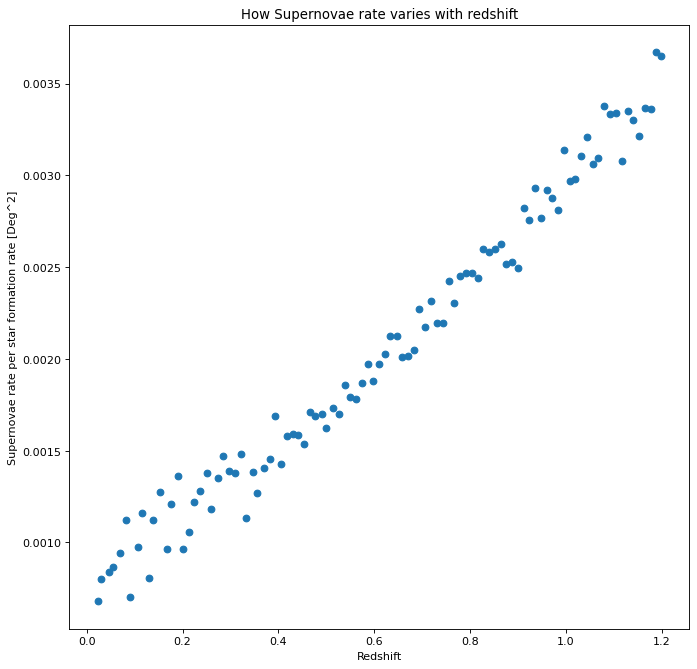

In [15]:
#Supernova rate per star formation rate in deg^2

z = data['Redshift_Observed']
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(1, len(bins_z))]
bin_means_sfr = [sfr[digitized_z == i].mean() for i in range(1, len(bins_z))]

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sfr)/4)
plt.xlabel('Redshift')
plt.ylabel('Supernovae rate per star formation rate [Deg^2]')
plt.title('How Supernovae rate varies with redshift')

plt.show()

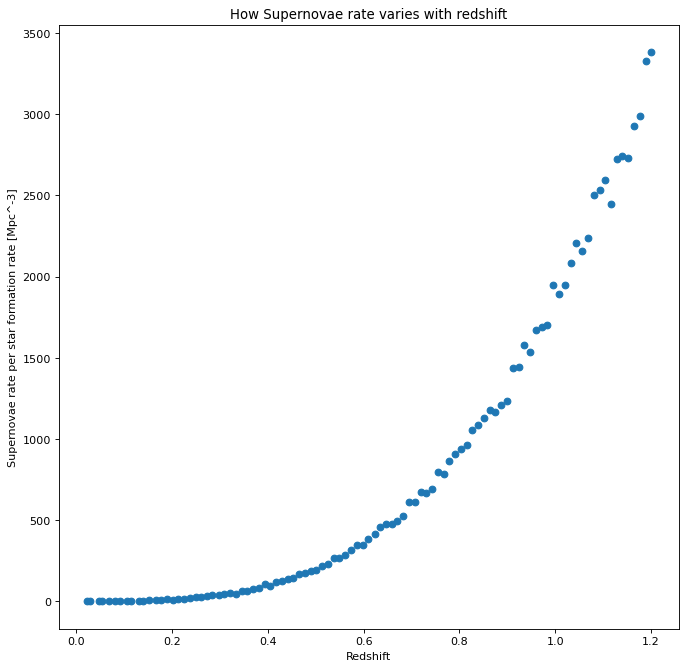

In [16]:
#Supernova rate per star formation rate in Mpc^-3

z = data['Redshift_Observed']
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(1, len(bins_z))]
bin_means_sfr = [sfr[digitized_z == i].mean() for i in range(1, len(bins_z))]

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sfr)/10**4*np.array(volume))
plt.xlabel('Redshift')
plt.ylabel('Supernovae rate per star formation rate [Mpc^-3]')
plt.title('How Supernovae rate varies with redshift')

plt.show()

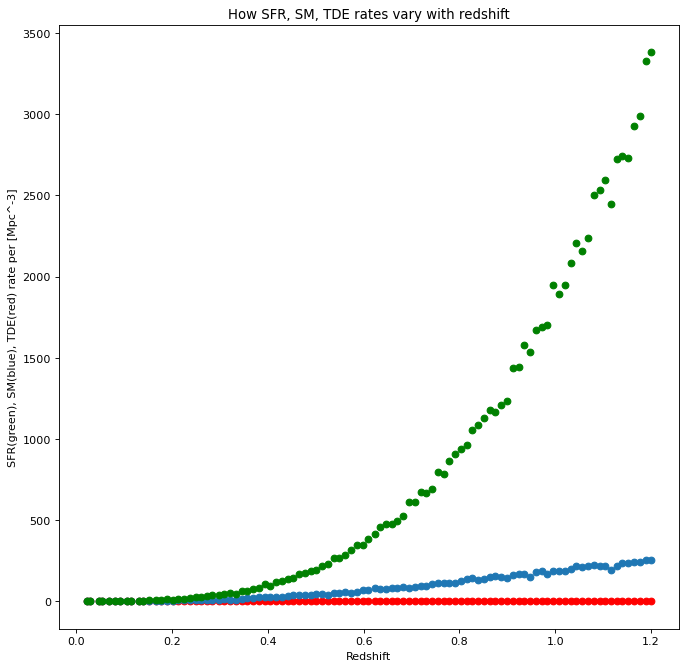

In [17]:
#Plot of all three in Mpc^-3

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_tde)/10**4*np.array(volume), color='r')
plt.scatter(bin_means_z, np.array(bin_means_sm)/10**4*np.array(volume))
plt.scatter(bin_means_z, np.array(bin_means_sfr)/10**4*np.array(volume), color='g')
plt.xlabel('Redshift')
plt.ylabel('SFR(green), SM(blue), TDE(red) rate per [Mpc^-3]')
plt.title('How SFR, SM, TDE rates vary with redshift')

plt.show()